**Import Dependencies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Works on Majority vote

In [5]:
from sklearn.datasets import load_digits
digits= load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

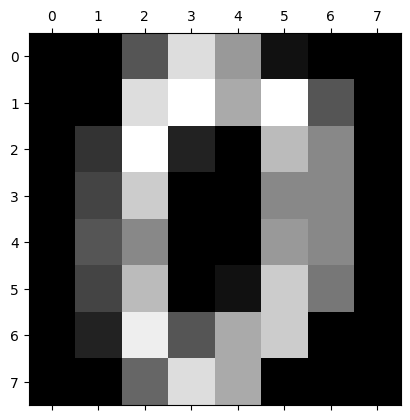

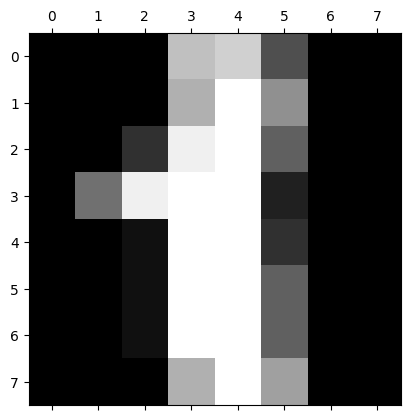

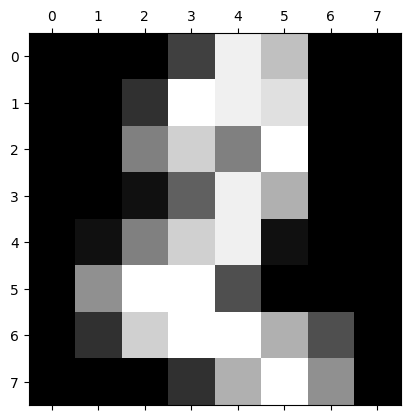

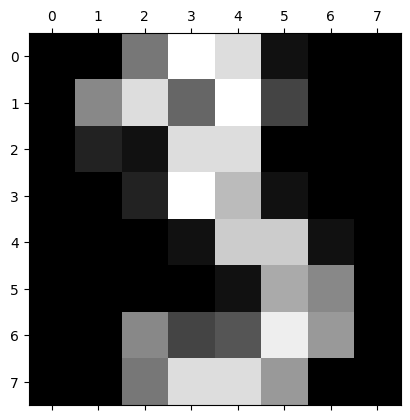

In [8]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [9]:
df= pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**Train Test Split**

In [16]:
X= df.drop(['target'], axis=1)
y= digits.target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=10)

In [19]:
len(X_train)

1437

In [20]:
len(X_test)

360

**Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=40)

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [27]:
model.score(X_test, y_test)

0.9611111111111111

In [28]:
y_pred= model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  0, 35]])

Text(95.72222222222221, 0.5, 'Truth')

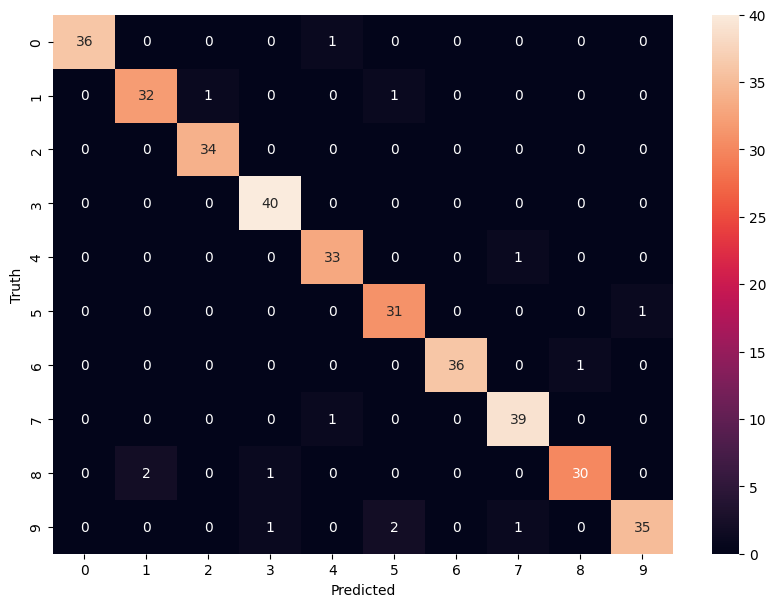

In [31]:

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')